In [43]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import FuncFormatter

In [44]:
### Taken from https://flynn.gg/blog/better-matplotlib-charts/
def number_formatter(number, pos=None):
    """Convert a number into a human readable format."""
    magnitude = 0
    while abs(number) >= 1000:
        magnitude += 1
        number /= 1000.0
    return '%.1f%s' % (number, ['', 'K', 'M', 'B', 'T', 'Q'][magnitude])
#ax.yaxis.set_major_formatter(FuncFormatter(number_formatter))

In [64]:
loss = pd.read_csv('../overall_loss.csv')
loss['loss']*=10**6
loss['medical_cost']*=10**6
loss['label'] = loss['intervention'].apply(lambda x: '{}%,{}d'.format(x.split('_')[-2],x.split('_')[-1]) if x!='none' else ' base')
loss['overall'] = loss['loss'] + loss['medical_cost']
loss.sort_values(['label','rep'],ascending=(False,True),inplace=True)

/apps/software/standard/compiler/gcc/7.1.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/boxplot.py:375: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  **kwds,


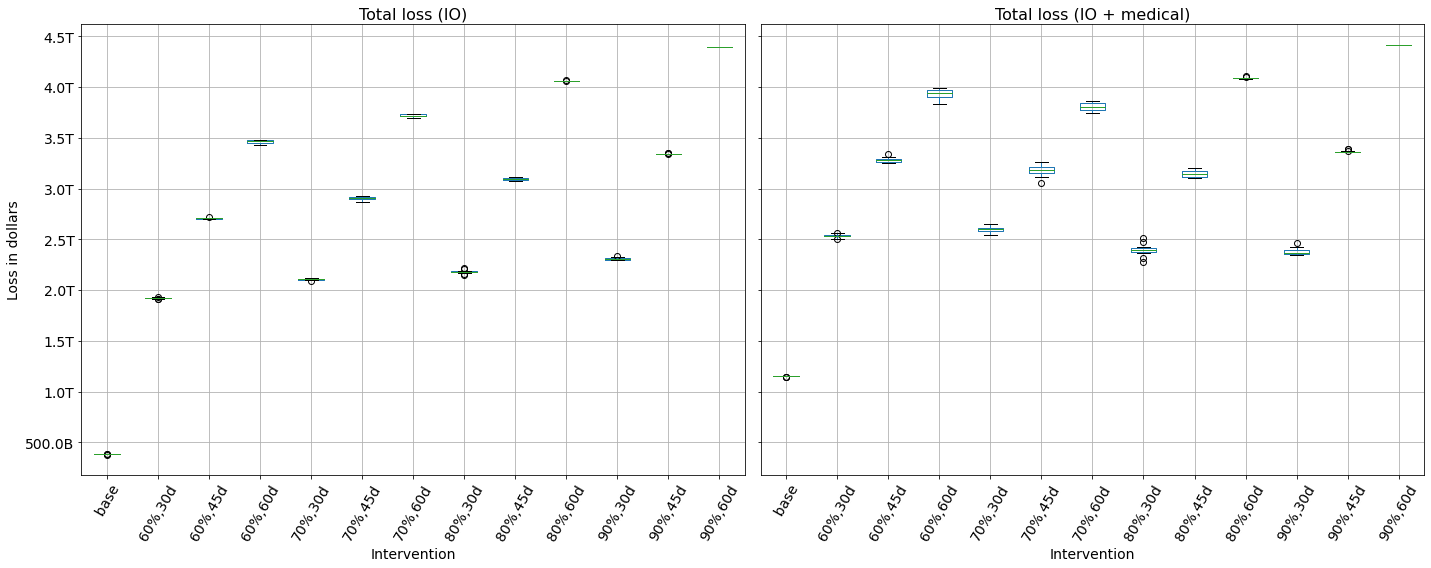

In [71]:
f,axarr = plt.subplots(1,2,figsize=(20,8),sharey=True)

loss.boxplot(column=['loss','overall'],by='label',rot=60,ax=axarr)
axarr[0].yaxis.set_major_formatter(FuncFormatter(number_formatter))

axarr[0].tick_params(labelsize=14)
axarr[1].tick_params(labelsize=14)

axarr[0].set_xlabel('Intervention',fontsize=14)
axarr[1].set_xlabel('Intervention',fontsize=14)

axarr[0].set_ylabel('Loss in dollars',fontsize=14)

plt.suptitle('')
axarr[0].set_title('Total loss (IO)',fontsize=16)
axarr[1].set_title('Total loss (IO + medical)',fontsize=16)
plt.tight_layout()
plt.savefig('../../fig/loss_boxplots.png',bbox_inches='tight',dpi=100)